In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import butter, lfilter
import IPython.display as ipd

In [3]:
file_path = 'sound-whale-and-monster.mp3'
y, sr = librosa.load(file_path)

print(f"Panjang sinyal (jumlah sampel): {len(y)}")
print(f"Sampling rate (sampel per detik): {sr}")

Panjang sinyal (jumlah sampel): 123312
Sampling rate (sampel per detik): 22050


In [4]:
n_fft = 4096
hop_length = n_fft // 4

# 3. Hitung STFT
stft_result = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
magnitude_spectrum = np.abs(stft_result)
magnitude_spectrum_db = librosa.amplitude_to_db(magnitude_spectrum, ref=np.max)
frequencies = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

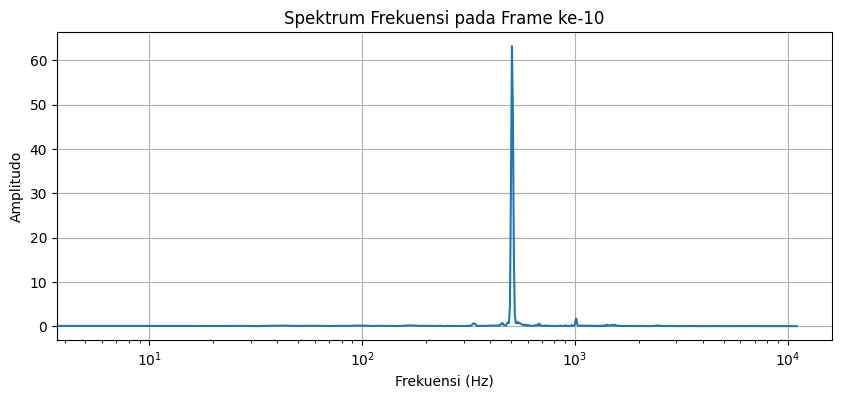

In [5]:
frame_index = 10
plt.figure(figsize=(10, 4))
plt.semilogx(frequencies, magnitude_spectrum[:, frame_index])  # Skala logaritmik untuk frekuensi
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Amplitudo")
plt.title(f"Spektrum Frekuensi pada Frame ke-{frame_index}")
plt.grid(True)
plt.show()

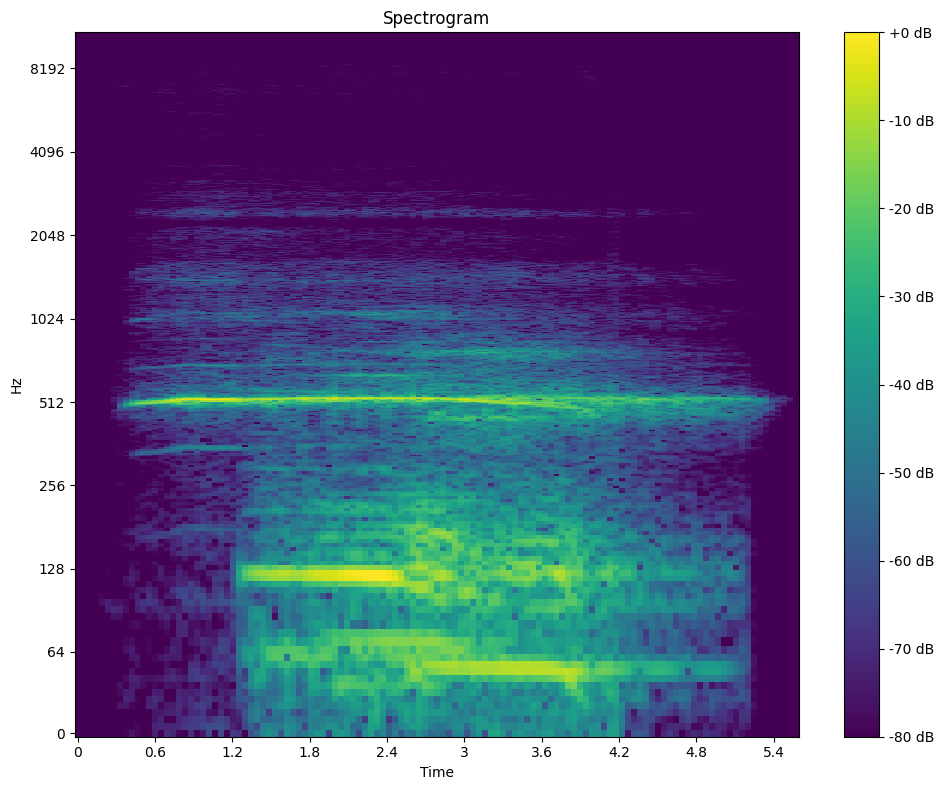

In [6]:
plt.figure(figsize=(10, 8))
librosa.display.specshow(magnitude_spectrum_db, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='log', cmap='viridis')  # Log scale dan colormap
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram")
plt.tight_layout()
plt.show()

In [7]:
cutoff_freq = 1000  # Hz
nyquist_freq = sr / 2
normalized_cutoff = cutoff_freq / nyquist_freq
order = 4
b, a = butter(order, normalized_cutoff, btype='low', analog=False)
y_filtered = lfilter(b, a, y)
sf.write('audio_filtered.wav', y_filtered, sr)



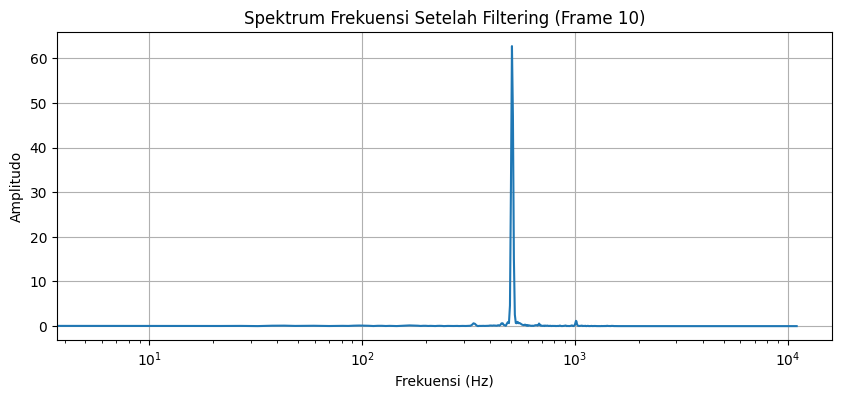

In [8]:
stft_result_filtered = librosa.stft(y_filtered, n_fft=n_fft, hop_length=hop_length)
magnitude_spectrum_filtered = np.abs(stft_result_filtered)
magnitude_spectrum_db_filtered = librosa.amplitude_to_db(magnitude_spectrum_filtered, ref=np.max)

plt.figure(figsize=(10, 4))
plt.semilogx(frequencies, magnitude_spectrum_filtered[:, frame_index])
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Amplitudo")
plt.title(f"Spektrum Frekuensi Setelah Filtering (Frame {frame_index})")
plt.grid(True)
plt.show()

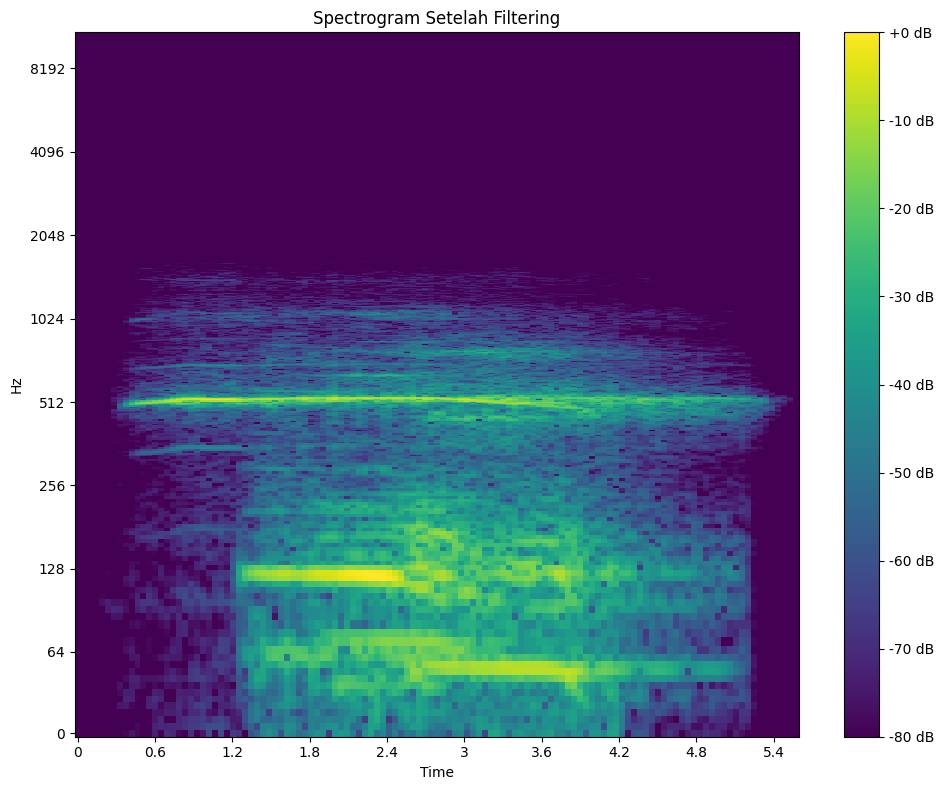

In [9]:
plt.figure(figsize=(10, 8))
librosa.display.specshow(magnitude_spectrum_db_filtered, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram Setelah Filtering")
plt.tight_layout()
plt.show()

In [10]:
ipd.Audio(y, rate=sr)  # Audio asli

In [11]:
ipd.Audio(y_filtered, rate=sr) # Audio setelah difilter

In [12]:
cutoff_freq_high = 500  # Hz
normalized_cutoff_high = cutoff_freq_high / nyquist_freq
b_high, a_high = butter(order, normalized_cutoff_high, btype='high', analog=False)
y_filtered_high = lfilter(b_high, a_high, y)
sf.write('audio_filtered_high.wav', y_filtered_high, sr)

print("Audio Setelah High-Pass Filtering:")
ipd.Audio(y_filtered_high, rate=sr)

Audio Setelah High-Pass Filtering:




1. How does the timbre change?

Timbre-nya berubah jadi beda. Yang tadinya suaranya kayak ada banyak campur-campur, abis difilter jadi kayak lebih bulet aja. Suara yang tinggi-tinggi kayak hilang, jadi suaranya lebih ngebass dan kurang jelas gitu.

2. Which harmonics disappeared after filtering?

Setelah difilter, frekuensi-frekuensi yang tinggi hilang. Jadi, harmonik-harmonik yang ada di frekuensi tinggi itu jadi hilang atau jadi kecil suaranya. Yang tepatnya harmonik ke berapa, saya kurang tahu, tapi pokoknya yang tinggi-tinggi itu hilang.

3. Which part sounds more muffled or brighter?

Yang lebih muffled itu yang udah difilter. Soalnya kan filternya itu buang suara-suara yang tinggi, jadi suaranya kayak ketutup gitu. Kalo yang brighter itu suara yang awal, yang belum difilter, karena masih ada suara-suara yang tinggi.